In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates= ['date'], index_col='date')
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [3]:
df.dtypes

value    int64
dtype: object

In [5]:
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


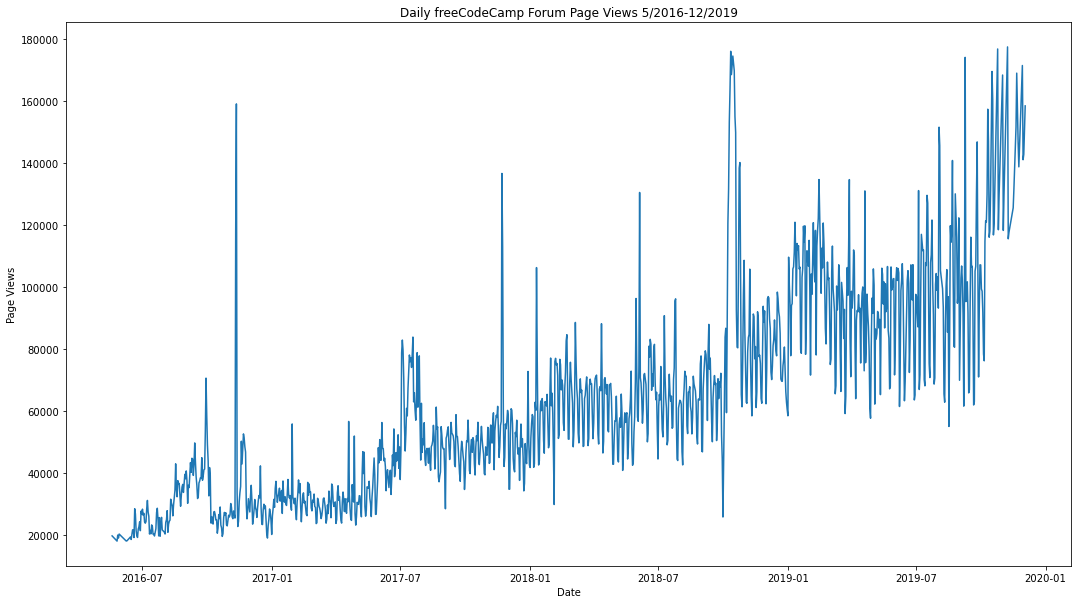

In [6]:
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(18,10))
    ax.plot(df.index, df.value)
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig
draw_line_plot()
plt.show()


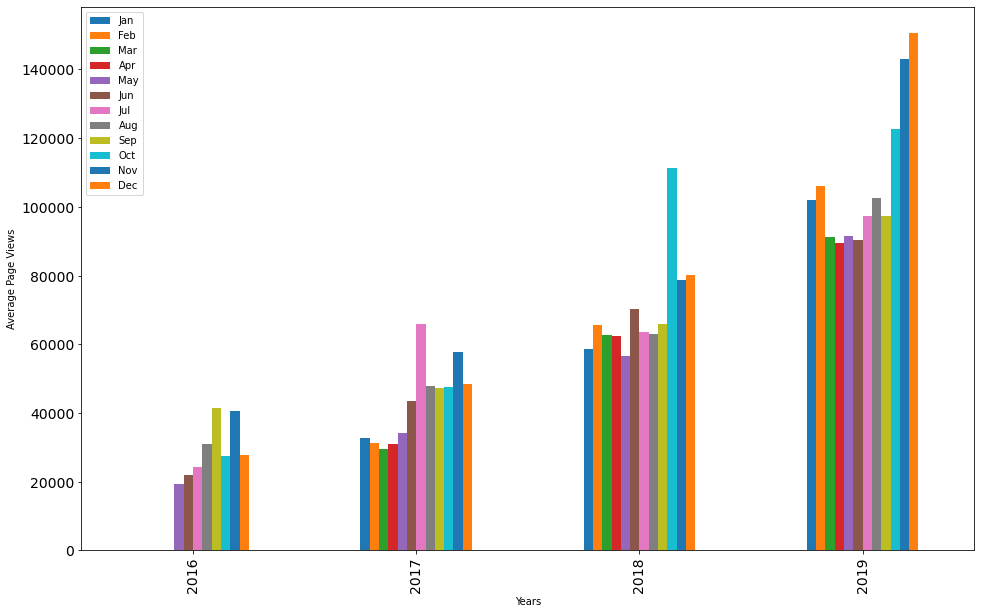

In [7]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df['month'] = df.index.month
    df['year'] = df.index.year
    df_bar = df.groupby(['year','month']).mean()
    df_bar = df_bar.unstack()

    # Draw bar plot
    fig = df_bar.plot.bar(legend=True, figsize=(16,10), xlabel='Years', ylabel='Average Page Views',).figure
    plt.legend(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig
draw_bar_plot()
plt.show()

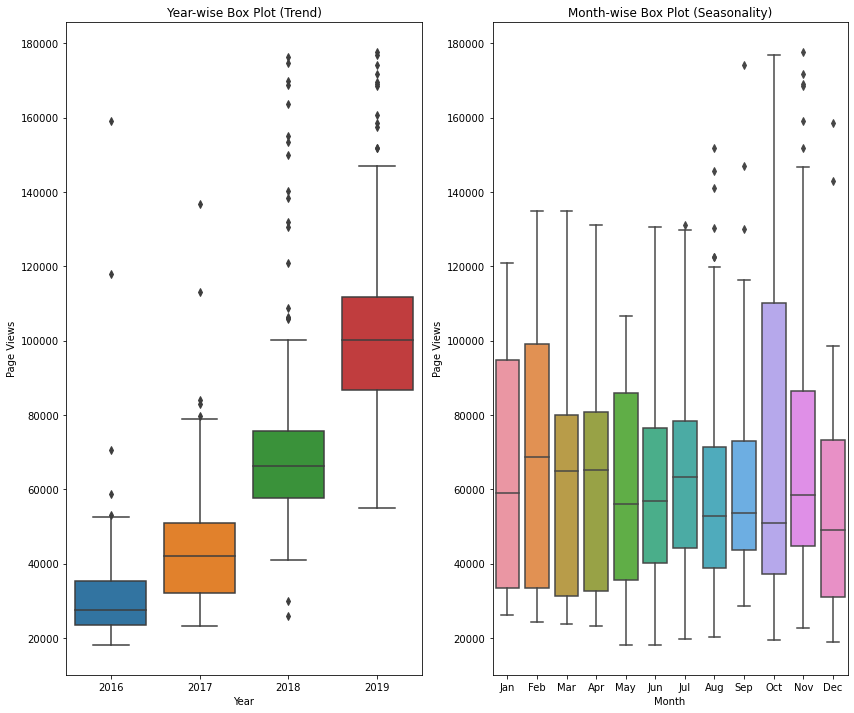

In [8]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    df_box['month_num'] = df_box['date'].dt.month
    df_box = df_box.sort_values('month_num')
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,12))
    axes[0] = sns.boxplot(x=df_box['year'], y=df_box['value'], ax=axes[0])
    axes[1] = sns.boxplot(x=df_box['month'], y=df_box['value'], ax=axes[1])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig
draw_box_plot()
plt.show()